# 離散フーリエ変換

## サンプリング定理

信号 $f(t)$ の離散的な点 $\left\{t_k\right\}, k=0, \pm 1, \pm 2, \pm 3, \ldots$ での値 $\left\{f_k\right\}$ を **サンプル点** $\left\{t_k\right\}$ での **サンプル値** と呼ぶ。
サンプル点 $\left\{t_k\right\}$ の間隔 $\tau$ を  **サンプル間隔** と呼ぶ。サンプル値 $\left\{f_k\right\}$ のみから連続関数を再現することを **補間** という。

次の性質を持つ関数 $\phi(t)$ をサンプル間隔 $\tau$ の **補間関数** と呼ぶ

$$
\phi(t)= \begin{cases}1 & t=0 \\ 0 & t= \pm \tau, \pm 2 \tau, \pm 3 \tau, \ldots\end{cases}
$$


補間関数の例は$\operatorname{sinc}$（cardinal sine）関数

$$
\operatorname{sinc}(x) =\frac{\sin \pi x}{\pi x}
$$


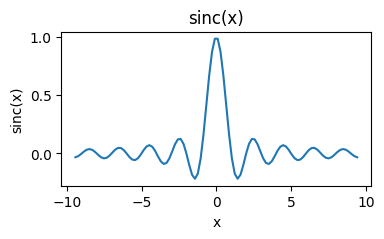

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    return np.sin(np.pi * x) / (np.pi * x)

fig, ax = plt.subplots(figsize=[4,2])

x = np.linspace(-3*np.pi, 3*np.pi, 100)
ax.plot(x, sinc(x))
ax.set(title="sinc(x)", xlabel="x", ylabel="sinc(x)")
fig.show()


$$
\hat{f}(t)=\sum_{k=-\infty}^{\infty} f_k \phi\left(t-t_k\right)
$$

はすべてのサンプル点$t_i$でサンプルの値$f_i$をとる

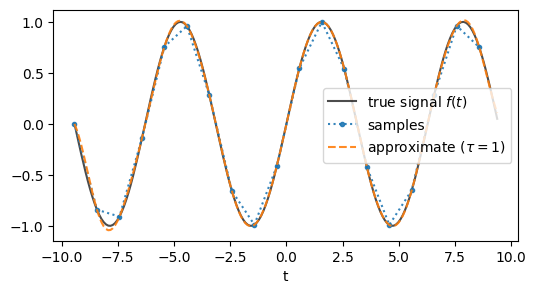

In [85]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,3])

# true signal
x = np.arange(-3 * np.pi, 3 * np.pi, 0.1)
y = np.sin(x)
ax.plot(x, y, label=r"true signal $f(t)$", color="black", alpha=0.7)

# samples
tau = 1 # tau: サンプリング周期
x_samples = np.arange(-3 * np.pi, 3 * np.pi, tau)
y_samples = np.sin(x_samples)

def approx(x, x_samples, y_samples, tau):
    y_hat = []
    for i in range(len(x)):
        y_hat_i = 0
        for j in range(len(y_samples)):
            y_hat_i += y_samples[j] * np.sinc((x[i] - x_samples[j]) / tau)
        y_hat.append(y_hat_i)
    return np.array(y_hat)

ax.plot(x_samples, y_samples, label=r"samples", alpha=0.9, linestyle=":", marker=".")
ax.plot(x, approx(x, x_samples, y_samples, tau=tau), label=rf"approximate ($\tau = {tau}$)", alpha=0.9, linestyle="--")
ax.set(xlabel="t", ylabel="")
ax.legend()
fig.show()

:::{admonition} 定義：帯域制限

信号$f(t)$のフーリエ変換を$F(\omega)$とするとき、

$$
|\omega| \geq W \implies F(\omega)=0
$$

であれば、信号$f(t)$は **帯域幅** $W$ に **帯域制限** されているという
:::

:::{admonition} サンプリング定理

帯域幅 $W$ に帯域制限された信号 $f(t)$ はサンプル間隔

$$
\tau=\frac{\pi}{W}
$$


のサンプル点 $\left\{t_k\right\}$ でのサンプル値 $\left\{f_k\right\}$ のみから次のように再現される

$$
f(t)=\sum_{k=-\infty}^{\infty} f_k \operatorname{sinc} \frac{t-t_k}{\tau}
$$

:::

:::{dropdown} 証明

信号$f(t)$のフーリエ変換は

$$
f(t)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \mathrm{~d} \omega, \quad F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} \mathrm{~d} t
$$

となる。$F(\omega)$は区間$[-W,W]$でフーリエ級数に展開できる

$$
F(\omega)=\sum_{k=-\infty}^{\infty} C_k e^{i \pi k \omega / W}, \quad C_k=\frac{1}{2 W} \int_{-W}^W F(\omega) e^{-i \pi k \omega / W} \mathrm{~d} \omega
$$

区間 $[-W, W]$ の外では $F(\omega)=0$ であるから、 $C_k$ は次のように計算できる。

$$
\begin{aligned}
C_k & =\frac{1}{2 W} \int_{-\infty}^{\infty} F(\omega) e^{-i \pi k \omega / W} \mathrm{~d} \omega\\
&=\frac{\pi}{W} \frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega(-\pi k / W)} \mathrm{d} \omega \\
& =\frac{\pi}{W} f\left(-\frac{\pi k}{W}\right)=\tau f(-k \tau)=\tau f_{-k}
\end{aligned}
$$

よって$F(\omega)$は区間$[-W,W]$で

$$
\begin{aligned}
F(\omega) & =\sum_{k=-\infty}^{\infty} \tau f_{-k} e^{i \pi k \omega / W}=\tau \sum_{k=-\infty}^{\infty} f_k e^{-i \pi k \omega / W} \\
& =\tau \sum_{k=-\infty}^{\infty} f_k e^{-i k \tau \omega}=\tau \sum_{k=-\infty}^{\infty} f_k e^{-i t_k \omega}
\end{aligned}
$$

となる。

まとめると、

$$
\begin{aligned}
f(t) & =\frac{1}{2 \pi} \int_{-W}^W F(\omega) e^{i \omega t} \mathrm{~d} \omega\\
& =\frac{1}{2 \pi} \int_{-W}^W\left(\tau \sum_{k=-\infty}^{\infty} f_k e^{-i t_k \omega}\right) e^{i \omega t} \mathrm{~d} \omega \\
& =\frac{\tau}{2 \pi} \sum_{k=-\infty}^{\infty} f_k \int_{-W}^W e^{i\left(t-t_k\right) \omega} \mathrm{d} \omega \\
& =\frac{\tau}{2 \pi} \sum_{k=-\infty}^{\infty} f_k \int_{-W}^W\left(\cos \left(t-t_k\right) \omega+i \sin \left(t-t_k\right) \omega\right) \mathrm{d} \omega \\
& =\frac{\tau}{\pi} \sum_{k=-\infty}^{\infty} f_k \int_0^W \cos \left(t-t_k\right) \omega \mathrm{d} \omega \\
& =\frac{1}{W} \sum_{k=-\infty}^{\infty} f_k \int_0^W \cos \left(t-t_k\right) \omega \mathrm{d} \omega
    \quad (\because \tau = \pi/W) \\
& =\frac{1}{W} \sum_{k=-\infty}^{\infty} f_k\left[\frac{\sin \left(t-t_k\right) \omega}{\left(t-t_k\right)}\right]_0^W\\
& =\sum_{k=-\infty}^{\infty} f_k \frac{\sin W\left(t-t_k\right)}{W\left(t-t_k\right)} \\
& =\sum_{k=-\infty}^{\infty} f_k \operatorname{sinc} \frac{W\left(t-t_k\right)}{\pi}\\
& =\sum_{k=-\infty}^{\infty} f_k \operatorname{sinc} \frac{t-t_k}{\tau}
\end{aligned}
$$

:::

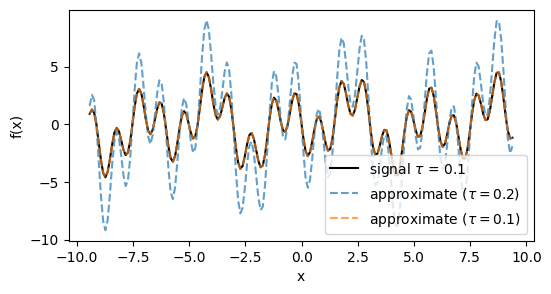

In [ ]:
tau = 0.1
x = np.arange(-3 * np.pi, 3 * np.pi, tau)
y1 = np.sin(x)
y2 = 2 * np.sin(2 * x + np.pi)
y3 = 2 * np.sin(2 * np.pi * x + np.pi)
y = y1 + y2 + y3 #合成波

def approx(x, tau=0.1): # tau: サンプリング周期。データの周期より小さくないとうまく近似できない
    n = len(x)
    Y = []
    for i in range(n):
        y_tmp = 0
        for j in range(n):
            y_tmp += y[j] * np.sinc((x[i] - x[j]) / tau)
        Y.append(y_tmp)
    return np.array(Y)
    
fig, ax = plt.subplots(figsize=[6,3])
ax.plot(x, y, label=r"signal $\tau$" + f" = {tau}", color="black")
ax.plot(x, approx(x, tau=0.2), label=r"approximate ($\tau = 0.2$)", alpha=0.7, linestyle="--")
ax.plot(x, approx(x, tau=0.1), label=r"approximate ($\tau = 0.1$)", alpha=0.7, linestyle="--")
ax.set(xlabel="x", ylabel="")
ax.legend()
fig.show()

:::{margin}
サンプリング定理を導いたのは情報理論の創始者であるシャノン（Claude E. Shannon: 1916-2001）
:::